In [1]:
#import face_recognition  #not used in this project yet
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
import os
import csv
import numpy as np

import time
import threading

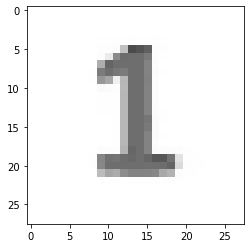

In [41]:
# load the example image
image = cv2.imread("data/testimg_num_1.jpg")

# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
#image = imutils.resize(image, height=500)
image = cv2.resize(image,(28,28), interpolation = cv2.INTER_AREA) 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 0)
edged = cv2.Canny(blurred, 50, 200, 255)



#plt.imsave("data/testimg_num_1_out.jpg",edged, cmap='gray', vmin=0, vmax=255)
#cv2.imwrite('data/testimg_num_1_out2.jpg', edged)


plt.imshow(blurred, cmap='gray', vmin=0, vmax=255)